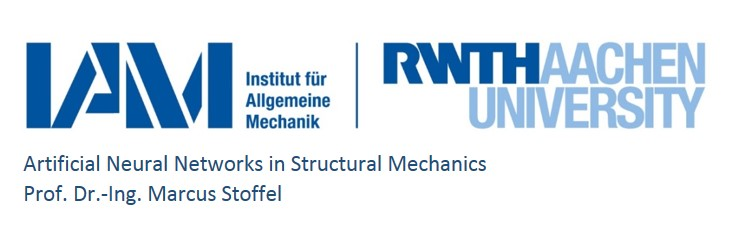

# Exercise 3 - 10. 11. 2022

# Activation functions, Forward Pass and Backpropagation

Task 1: Define sigmoid and tanh activation functions and their derivatives.

Task 2: Define a function that calculates the forward pass for a Feedforward neural network (FFNN) and return the weighted sums(z11,z12,z1) and activated outputs of each layer (a11,a12,o). Activated outputs are obtained by passing respective weighted sum into the activation function(sigmoid,tanh, etc).

1. The network must have 3 layers. Input, One Hidden Layer and Output Layer.

2. Input layer and the hidden layer has 2 neurons each, and Output Layer has one neuron. [2,2,1]

3. w1 (num_input,num_hidden) and b1 (num_hidden,1) represent the weights and biases between the input and hidden layer respectively.

4. w2 (num_hidden,num_outpu) and b2 (num_output,1) represent the weights and bias between the hidden and output layer respectively.

5. Activation functions are used in all layers with activations including output layer.

6. Define a function to calculate the forward pass and return hidden layer and output layer values.

7. Call the function and print the computed outputs.

8. Compare the outputs from sigmoid and tanh activation functions.


Task 3: Define backpropagation function and compute deltas referring to the lectures.

The notations used are same as Exercise 3.

### Notations

x - inputs

w - weights

b - thresholds

z - weighted sums

a - values after activation

o - network output

y - desired output


In [1]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

### Import training data

The training data is imported from a csv file called nn_data.csv. 

- Make sure to save this file in the same directory from where the iPython Notebook is executed

- First two columns correspond to $x_1$ and $x_2$ while the third column corresponds to desired output $d$

- Dataset has 200 points

- $x_1$ and $x_2$ are randomly generated between 0 and 1

- The desired output $d$ is $sin(x_1 + x_2)$

In [2]:
file_path = './nn_data.csv'
training_data = np.genfromtxt(file_path, delimiter=',')
training_data.shape

(1000, 3)

### Initialization of Weights and Bias

The weight matrices and the bias vectors are initialized with random numbers between -1 and 1

In [3]:
# Define random seed 
np.random.seed(22)

# Network architecture
net_shape = [2,2,1]
num_input = net_shape[0]
num_hidden = net_shape[1]
num_out = net_shape[-1]

global w1
global w2
global b1
global b2

w1 = np.random.uniform(low = -1, high = 1, size = (num_hidden,num_input))
b1 = np.random.uniform(low = -1, high = 1, size = (num_hidden,1))

w2 = np.random.uniform(low = -1, high = 1, size = (num_out,num_hidden))
b2 = np.random.uniform(low = -1, high = 1, size = (num_out,1))

In [4]:
# Initialise weights and biases
#def initialise():
    #w1 = np.random.uniform(low = -1, high = 1, size = (num_hidden,num_input))
    #b1 = np.random.uniform(low = -1, high = 1, size = (num_hidden,1))

    #w2 = np.random.uniform(low = -1, high = 1, size = (num_out,num_hidden))
    #b2 = np.random.uniform(low = -1, high = 1, size = (num_out,1))
    #return w1,w2,b1,b2

In [5]:
# Define activation functions

def sigmoid(z):
    A = 1/(1 + np.exp(-z))
    return A                      
  
def tanh(z):
    A = (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    return A 

def sigmoid_der(z):
    return z*(1-z)

def tanh_der(z):
    return 1-z**2

def activation(z,act):
    if act == 'sigmoid':
        return sigmoid(z)
    elif act == 'tanh':
        return tanh(z)
    
def activation_der(z,act):
    if act == 'sigmoid':
        return sigmoid_der(z)
    elif act == 'tanh':
        return tanh_der(z)

### Feedforward Function

This function accepts a 2x1 input vector and computes the weighted sum for the hidden layer, activates it and performs the same on the output layer to generate the output. 

The weighted sums are denoted by net1 and net2 for hidden and output layer respectively. 

The activations of the hidden and output layer are denoted by y1 and o respectively

Function returns o and y1

In [6]:
# Define forward pass function that takes input and activation name as input arguments

def fp(ip,act):
    nSamples = ip.shape[-1] # No. Training Samples
    # Hidden Layer Weighted Sum
    net1 = np.matmul(w1,ip) + b1 # hidden layer weighted sums
    # Hidden Layer Activation
    y1 = np.zeros(shape = (num_hidden,nSamples))
    for jj in range(0,nSamples):
      for kk in range(0,num_hidden):
        y1[kk,jj] = activation(net1[kk,jj],act)  
            
    # Output Layer Weighted Sum
    net2 = np.matmul(w2,y1) + b2
    # Output Layer Activation
    o = np.zeros(shape = (num_out,nSamples))
    for jj in range(0,nSamples):
        for kk in range(0,num_out):
            o[kk,jj] = activation(net2[kk,jj],act)
    
    
    return y1, o, net1, net2

In [7]:
# Call the functions
# Training Data (input)
x = training_data[:,0:2] # Training Samples
x = x.reshape(2,training_data.shape[0])
X = np.linspace(-20,20,2000).reshape(1000,2)
d = training_data[:,-1] # Desired Output
y1,o,net1,net2 = fp(x,'tanh') # Expected Size of y1 -> 2xnSamples, Expected Size of o -> 1xnSamples

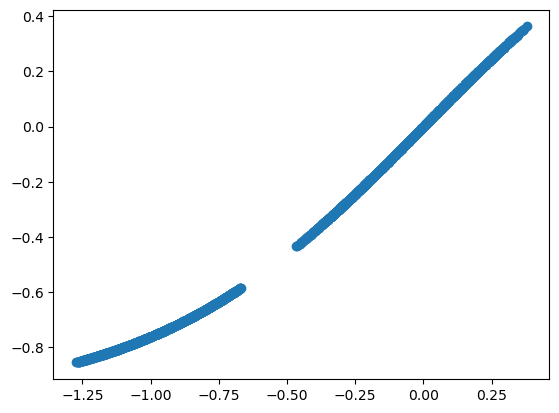

In [8]:
# Plot Weighted sum vs Activation
plt.scatter(net1,y1)

## Backpropagation Function

This function accepts 5 inputs - learning rate eta, desired output d, network output o, hidden layer activation y1 and the input vector inp.

The weight and bias gradients are stored as delta_w1, delta_b1, delta_w2, delta_b2

The function returns the gradients

In [9]:
# Define the back propagation function that takes learning rate, desired and predicted output, hidden layer activation 
# and input as input arguments and returns deltas

def bp(eta,d,o,y1,inp,act):
    
    # Function computes the gradient for one training sample
    delta_w1 = np.zeros(shape = w1.shape)
    delta_w2 = np.zeros(shape = w2.shape)
    delta_b1 = np.zeros(shape = b1.shape)
    delta_b2 = np.zeros(shape = b2.shape)
    # Between hidden and output layer
    for kk in range(0,num_out):
        delta_b2[kk,0] = eta*(o-d)*activation_der(o,act) # No. Output Neurons = No. Biases between Hidden and Output Layer
        for jj in range(0,num_hidden):
            delta_w2[kk,jj] = delta_b2[kk,0]*y1[jj] # No. Hidden Neurons = No. Weights between Hidden and Output Layer
    
    # Between input and hidden layer
    for kk in range(0,num_hidden):
        delta_b1[kk,0] = eta*(o-d)*activation_der(o,act)*w2[0,kk]*activation_der(y1[kk],act) # No. hidden neurons = No. Biases between Hidden and Input Layer
        for jj in range(0,num_input):
            delta_w1[kk,jj] = delta_b1[kk,0]*inp[jj]
    return delta_b1,delta_b2,delta_w1,delta_w2

### Online Training

One epoch refers to having looped through the entire dataset once. The input vector is generated from a single row of training data set. It is fed forward through the entire network 
and the network output is calculated. Next backpropagation is carried out to calculate the gradients of the weights and bias. The weights and bias are then updated immediately before moving on to the next
row of the data set. The error value is printed every 20 epochs

In [10]:
# Define training parameters
num_epochs = 10
eta = 0.1
act = 'sigmoid'
epochs = range(1,num_epochs+1)
for epoch in epochs:
    # Calculating all outputs in Feedforward
    y1,o,net1,net2 = fp(x,act)
    nSamples = x.shape[-1]
    # Calculating gradients using Back-propogation
    for ii in range(0,nSamples):
        # Delta computed for each training sample
        inp = x[:,ii]
        delta_b1,delta_b2,delta_w1,delta_w2 = bp(eta,d[ii],o[0,ii],y1[:,ii],x[:,ii],act)
        # Updating the weights and biases
        w1 = w1 - delta_w1
        w2 = w2 - delta_w2
        b1 = b1 - delta_b1
        b2 = b2 - delta_b2
    if int(epoch)%1 == 0:
        error = 0.5*np.sum((o-d)**2)
        print('***************************************************')
        print('Epoch: ' + str(epoch))
        print('Error = ' + str(error))


***************************************************
Epoch: 1
Error = 100.56918398028213
***************************************************
Epoch: 2
Error = 48.67590175656176
***************************************************
Epoch: 3
Error = 48.675901755763796
***************************************************
Epoch: 4
Error = 48.67590175496581
***************************************************
Epoch: 5
Error = 48.675901754167796
***************************************************
Epoch: 6
Error = 48.67590175336976
***************************************************
Epoch: 7
Error = 48.675901752571704
***************************************************
Epoch: 8
Error = 48.67590175177362
***************************************************
Epoch: 9
Error = 48.67590175097551
***************************************************
Epoch: 10
Error = 48.67590175017739


In [11]:
delta_b2

array([[1.43559519e-09]])